In [2]:
import csv
import pandas as pd
import csv
import numpy as np
import matplotlib.pylab as plt
import scipy.spatial as ss
from cell import utils, analysis, plot_utils
import seaborn as sns

### CMD scale function

In [3]:
from __future__ import division
 
import numpy as np
 
def cmdscale(D):
    """                                                                                       
    Classical multidimensional scaling (MDS)                                                  
                                                                                               
    Parameters                                                                                
    ----------                                                                                
    D : (n, n) array                                                                          
        Symmetric distance matrix.                                                            
                                                                                               
    Returns                                                                                   
    -------                                                                                   
    Y : (n, p) array                                                                          
        Configuration matrix. Each column represents a dimension. Only the                    
        p dimensions corresponding to positive eigenvalues of B are returned.                 
        Note that each dimension is only determined up to an overall sign,                    
        corresponding to a reflection.                                                        
                                                                                               
    e : (n,) array                                                                            
        Eigenvalues of B.                                                                     
                                                                                               
    """
    # Number of points                                                                        
    n = len(D)
 
    # Centering matrix                                                                        
    H = np.eye(n) - np.ones((n, n))/n
 
    # YY^T                                                                                    
    B = -H.dot(D**2).dot(H)/2
 
    # Diagonalize                                                                             
    evals, evecs = np.linalg.eigh(B)
 
    # Sort by eigenvalue in descending order                                                  
    idx   = np.argsort(evals)[::-1]
    evals = evals[idx]
    evecs = evecs[:,idx]
 
    # Compute the coordinates using positive-eigenvalued components only                      
    w, = np.where(evals > 0)
    L  = np.diag(np.sqrt(evals[w]))
    V  = evecs[:,w]
    Y  = V.dot(L)
 
    return Y, evals

### Path to data and output

In [4]:
# Path
data_dir = "/Users/fahimehb/Documents/NPP_GNN_project/dat/"
Output_dir = "/Volumes/programs/celltypes/workgroups/rnaseqanalysis/Fahimehb/GNN/Outputs/"

### Read inputs

In [5]:
cl_df = pd.read_csv("/Users/fahimehb/Documents/GNN/dat/cl_df_150cl.csv", index_col="Unnamed: 0")
JSD = pd.read_csv(data_dir + "/jsd_python_recomputed.csv", index_col="Unnamed: 0")

In [6]:
cl_df = cl_df.set_index("cluster_id")
cl_df.index = cl_df.index.astype('str')
cl_df.head()

,cluster_label,cluster_color,subclass_id,subclass_label,subclass_color,class_id,class_label,class_color,dendcluster_id,dendcluster_label,dendcluster_color,mu_x,mu_y
cluster_id,,,,,,,,,,,,,
61,L2/3 IT VISp Rrad,#D9F077,7,L2/3 IT,#94D9A1,2,Glutamatergic,#27AAE1,1.0,L2/3 IT VISp Rrad,#D9F077,0.155991,-0.443063
62,L2/3 IT VISp Adamts2,#A6E6A9,7,L2/3 IT,#94D9A1,2,Glutamatergic,#27AAE1,2.0,L2/3 IT VISp Adamts2,#A6E6A9,0.333016,-0.540455
63,L2/3 IT VISp Agmat,#7AE6AB,7,L2/3 IT,#94D9A1,2,Glutamatergic,#27AAE1,3.0,L2/3 IT VISp Agmat,#7AE6AB,0.323327,-0.576560
64,L2/3 IT ALM Sla,#82AD7D,7,L2/3 IT,#94D9A1,2,Glutamatergic,#27AAE1,4.0,L2/3 IT ALM Sla,#82AD7D,0.498074,-0.641736
65,L2/3 IT ALM Ptrf,#B8FFCA,7,L2/3 IT,#94D9A1,2,Glutamatergic,#27AAE1,5.0,L2/3 IT ALM Ptrf,#B8FFCA,0.481052,-0.634547


Cluster colors for plotting

In [7]:
#cldf = utils.read_visp_npp_cldf()

In [8]:
types = JSD.index.tolist()
type_id = []

for t in types:
    type_id.append(str(cl_df[cl_df['cluster_label']==t].index.tolist()[0]))

In [9]:
JSD.head()

,L2/3 IT VISp Rrad,L2/3 IT VISp Adamts2,L2/3 IT VISp Agmat,L2/3 IT ALM Sla,L2/3 IT ALM Ptrf,L2/3 IT ALM Macc1 Lrg1,L4 IT VISp Rspo1,L5 IT VISp Hsd11b1 Endou,L5 IT VISp Whrn Tox2,L5 IT VISp Batf3,...,Pvalb Calb1 Sst,Pvalb Akr1c18 Ntf3,Pvalb Sema3e Kank4,Pvalb Gpr149 Islr,Pvalb Reln Itm2a,Pvalb Reln Tac1,Pvalb Tpbg,Pvalb Vipr2,Meis2 Adamts19,CR Lhx5
L2/3 IT VISp Rrad,0.000000,0.301102,0.298124,0.368229,0.380890,0.374299,0.443092,0.424371,0.451549,0.460754,...,0.652734,0.672896,0.681676,0.662296,0.670632,0.645035,0.642742,0.651381,0.931339,0.960910
L2/3 IT VISp Adamts2,0.301102,0.000000,0.188236,0.214161,0.270566,0.258561,0.400160,0.355376,0.366944,0.384346,...,0.594207,0.612206,0.620531,0.611896,0.613267,0.587671,0.586599,0.607065,0.926450,0.950134
L2/3 IT VISp Agmat,0.298124,0.188236,0.000000,0.226926,0.199509,0.200723,0.338924,0.310884,0.338887,0.349076,...,0.585534,0.599034,0.603322,0.595078,0.597362,0.577257,0.572084,0.596130,0.939060,0.964855
L2/3 IT ALM Sla,0.368229,0.214161,0.226926,0.000000,0.184497,0.175146,0.434578,0.367249,0.361779,0.396239,...,0.597412,0.607766,0.604308,0.614858,0.609763,0.595626,0.581946,0.616643,0.955213,0.983243
L2/3 IT ALM Ptrf,0.380890,0.270566,0.199509,0.184497,0.000000,0.184492,0.416107,0.355162,0.357739,0.377770,...,0.591342,0.600843,0.597574,0.601609,0.600725,0.587534,0.575117,0.603320,0.950286,0.986370


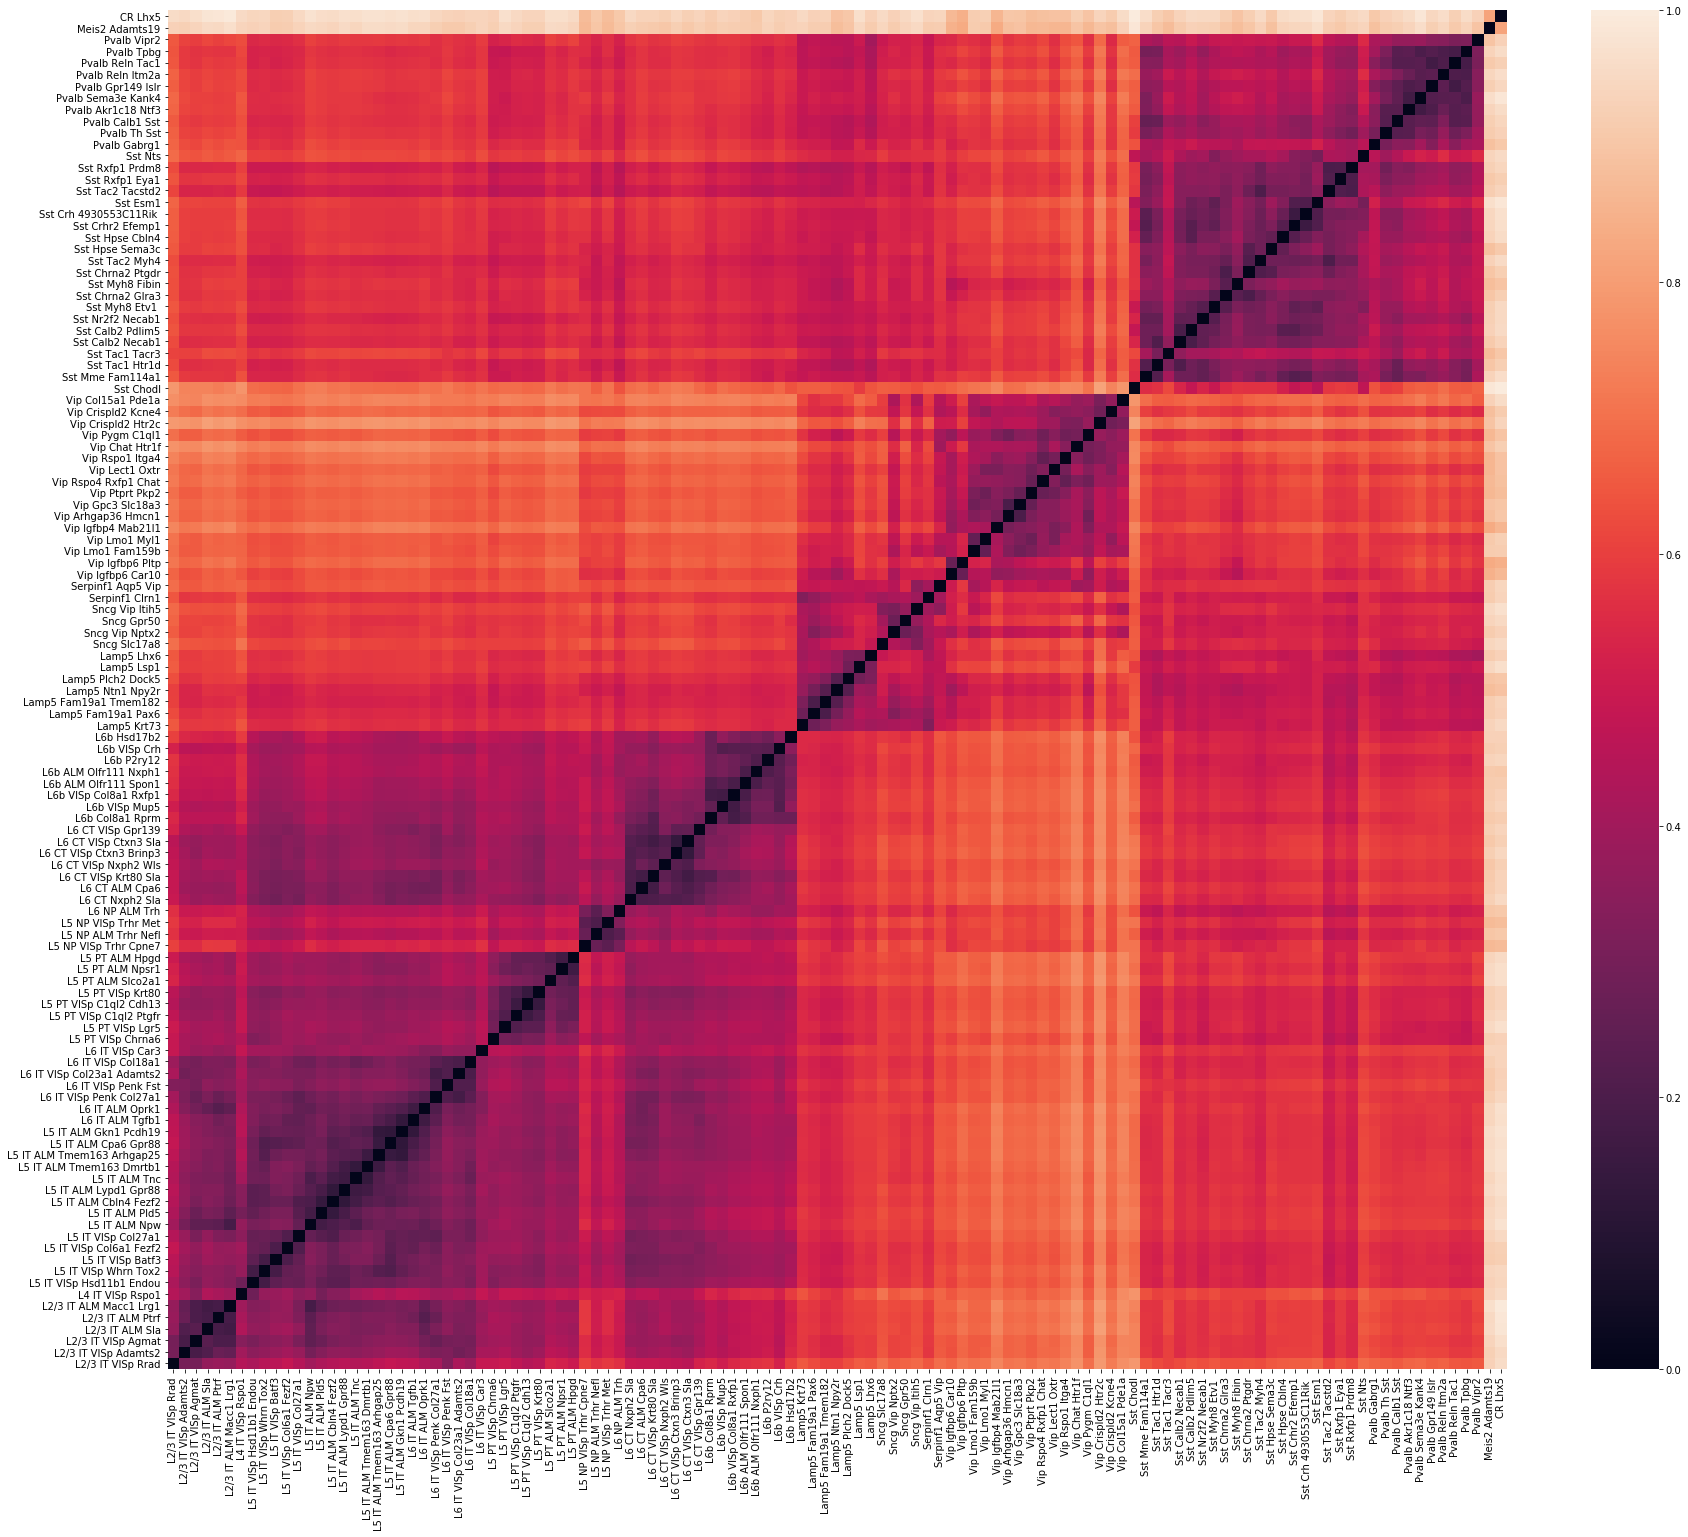

In [10]:
fig = plt.figure(figsize=(30,25))

ax = sns.heatmap(JSD)
ax.tick_params(labelsize=10)
ax.invert_yaxis()

In [11]:
fig.savefig("/Users/fahimehb/Documents/GNN/dat/jsd_results/jsd_graph.png", dpi=100)

### Apply CMD scale on JSD matrix

In [12]:
[Y,eigvals] = cmdscale(np.array(JSD))
#eigvals/max(abs(eigvals))

There are 37 positive eigenvalues in B matrix and therefore the shape of the Y has 93 by 37 dimensions

### Plotting the eigenvalues of the B matrix

Positive eigen values and eigenvectors of B matrix will define the coordinate of the nodes for which we provided JSD matrix

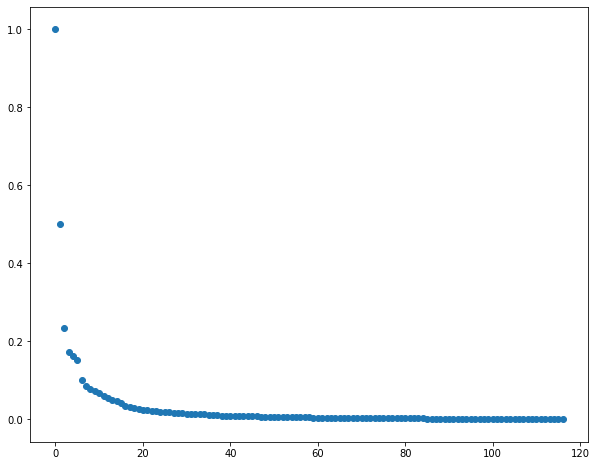

In [13]:
plt.figure(figsize=(10,8))
plt.scatter(x = range(len(eigvals)), y = eigvals/max(abs(eigvals)))

In [14]:
import cell
import imp
from cell import plot_utils

imp.reload(cell)
imp.reload(plot_utils)

<module 'cell.plot_utils' from '/Users/fahimehb/Documents/git-workspace/celltypes/cell/plot_utils.py'>

In [15]:
data = analysis.summarize_walk_embedding_results(gensim_dict={"model": Y},
                                                 index = type_id,
                                                 ndim=Y.shape[1])

In [16]:
data = data.merge(cl_df, on="cluster_id")

In [18]:
%matplotlib qt5
data["Z0"]  = -1 * data["Z0"]
data["Z2"]  = -1 * data["Z2"]

ax = plot_utils.plot_embedding(data=data, 
                          cl_df=cl_df,
                          plot_dim=3, 
                          plot_size=(5,5), annotation=True)

# data["Z"]  = -1 * data["Z"]
# ax.set_xlim(-0.6, 0.4)
# ax.set_ylim(-0.4, 0.4)

# ax.set_zlim(-0.5,0.5)

In [124]:
fig.savefig("/Users/fahimehb/Documents/GNN/dat/jsd_results/cmd_2d.png", dpi=750)

In [23]:
data.loc['117']

Z0                   0.172749
Z1                   0.243277
Z2                   0.578486
Z3                   0.235867
Z4                  -0.181402
                       ...   
dendcluster_id            117
dendcluster_label     CR Lhx5
dendcluster_color     #00FF66
mu_x                -0.738972
mu_y                -0.232964
Name: 117, Length: 130, dtype: object

In [24]:
wv_emb_2d = pd.read_csv("/Users/fahimehb/Documents/GNN/dat/jsd_results/wv_2d.csv", 
                      index_col="cluster_id")
wv_emb_2d.index = wv_emb_2d.index.astype('str')

In [25]:
mtx1, mtx2, disparity = analysis.run_procrustes_analysis(wv_emb_2d[["Z0", "Z1"]], 
                                                         data[["Z0", "Z1"]],
                                                         cl_df=cl_df)

In [28]:
disparity

0.03431588660373885

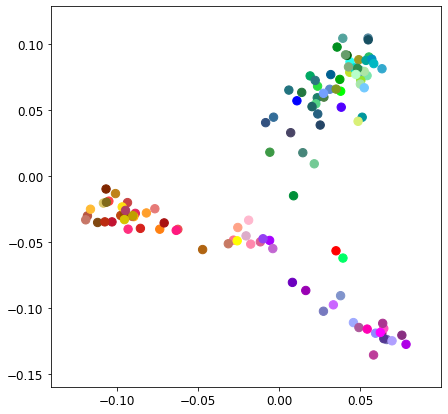

In [31]:
%matplotlib inline
fig= plot_utils.plot_embedding(data=mtx1,
                               plot_dim=2, 
                               plot_size=(7,7), 
                               annotation=False,
                              scatter_point_size=70)

As the first 4(or 2) eigenvalues are much larger than the rest, maybe those are sufficient to explain the coordinates

In [32]:
fig.savefig("/Users/fahimehb/Documents/GNN/dat/jsd_results/wv_2d.png", dpi=750)

### Find the most similar node to a given node

In [52]:
data.loc[['93', '94']]['cluster_label']

cluster_id
93     L5 PT VISp Krt80
94    L5 PT ALM Slco2a1
Name: cluster_label, dtype: object

In [222]:
nn = analysis.get_closest_node_label(Y, type_id, "73", 30, cl_df)

closest nodes to : L5 IT ALM Npw
------------------------------------------

                         cluster_label
cluster_id                            
74                      L5 IT ALM Pld5
66              L2/3 IT ALM Macc1 Lrg1
75               L5 IT ALM Cbln4 Fezf2
77                       L5 IT ALM Tnc
76               L5 IT ALM Lypd1 Gpr88
65                    L2/3 IT ALM Ptrf
63                  L2/3 IT VISp Agmat
64                     L2/3 IT ALM Sla
83                     L6 IT ALM Oprk1
78            L5 IT ALM Tmem163 Dmrtb1
72                  L5 IT VISp Col27a1
81               L5 IT ALM Gkn1 Pcdh19
82                     L6 IT ALM Tgfb1
79          L5 IT ALM Tmem163 Arhgap25
80                L5 IT ALM Cpa6 Gpr88
84             L6 IT VISp Penk Col27a1
87                  L6 IT VISp Col18a1
62                L2/3 IT VISp Adamts2
68            L5 IT VISp Hsd11b1 Endou
86          L6 IT VISp Col23a1 Adamts2
69                L5 IT VISp Whrn Tox2
85                 L6 IT V

In [54]:
data.to_csv("/Users/fahimehb/Documents/NPP_GNN_project/dat/CMDscale_emb.csv")

In [53]:
data

,Z0,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,...,subclass_label,subclass_color,class_id,class_label,class_color,dendcluster_id,dendcluster_label,dendcluster_color,mu_x,mu_y
cluster_id,,,,,,,,,,,,,,,,,,,,,
61,0.219141,0.117057,0.022932,0.039266,-0.184456,0.028196,-0.069773,0.006984,-0.131622,0.054654,...,L2/3 IT,#94D9A1,2,Glutamatergic,#27AAE1,1.0,L2/3 IT VISp Rrad,#D9F077,0.155991,-0.443063
62,0.226801,0.079139,0.043253,0.022843,-0.151698,0.009717,-0.069516,-0.001564,-0.085826,0.071534,...,L2/3 IT,#94D9A1,2,Glutamatergic,#27AAE1,2.0,L2/3 IT VISp Adamts2,#A6E6A9,0.333016,-0.540455
63,0.244495,0.079880,0.068406,0.028988,-0.149513,0.038198,-0.056586,0.016406,-0.065344,0.037604,...,L2/3 IT,#94D9A1,2,Glutamatergic,#27AAE1,3.0,L2/3 IT VISp Agmat,#7AE6AB,0.323327,-0.576560
64,0.264880,0.049509,0.080958,0.020542,-0.143946,0.008922,-0.000039,-0.001866,-0.054991,0.072428,...,L2/3 IT,#94D9A1,2,Glutamatergic,#27AAE1,4.0,L2/3 IT ALM Sla,#82AD7D,0.498074,-0.641736
65,0.258573,0.058812,0.087177,0.022847,-0.140700,0.016744,-0.000162,0.037826,-0.044024,0.045390,...,L2/3 IT,#94D9A1,2,Glutamatergic,#27AAE1,5.0,L2/3 IT ALM Ptrf,#B8FFCA,0.481052,-0.634547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,-0.132773,-0.181669,0.006698,0.191333,0.044209,0.120834,-0.013270,0.055608,0.003027,0.016204,...,Pvalb,#D93137,1,GABAergic,#EF4136,113.0,Pvalb Reln Tac1,#D6221D,0.339660,0.851103
59,-0.109593,-0.210584,0.036595,0.181838,0.038704,0.114710,0.018578,0.042826,-0.017776,0.001093,...,Pvalb,#D93137,1,GABAergic,#EF4136,114.0,Pvalb Tpbg,#AF3F64,0.569225,0.912010
60,-0.139890,-0.115837,0.024129,0.189445,0.042264,0.040744,-0.028303,0.068164,-0.009566,-0.018777,...,Pvalb,#D93137,1,GABAergic,#EF4136,115.0,Pvalb Vipr2,#FF197F,0.592510,0.765529
